<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Oct/20-10/DESI_Ejercicio_22_10_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scienceplots

In [2]:
import numpy as np
from astropy.io import fits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scienceplots
import enum
from astropy.io import fits
from astropy.table import Table
import os
plt.style.use(['science', 'no-latex'])

In [3]:
# Load spectra from a file
spectra_file = fits.open("/content/drive/MyDrive/Machine-Learning-2023/DESI_EDR/coadd-sv3-dark-25956.fits")
flux_b = spectra_file["B_FLUX"].data  # Assuming PCA on the "B" band
wavelength = spectra_file["B_WAVELENGTH"].data

# Perform PCA on the spectra
n_components = 30  # Number of principal components to retain (you can change this)
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(flux_b)

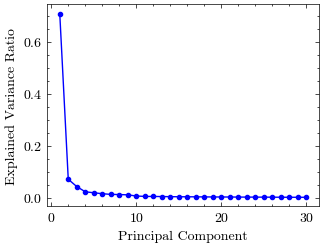

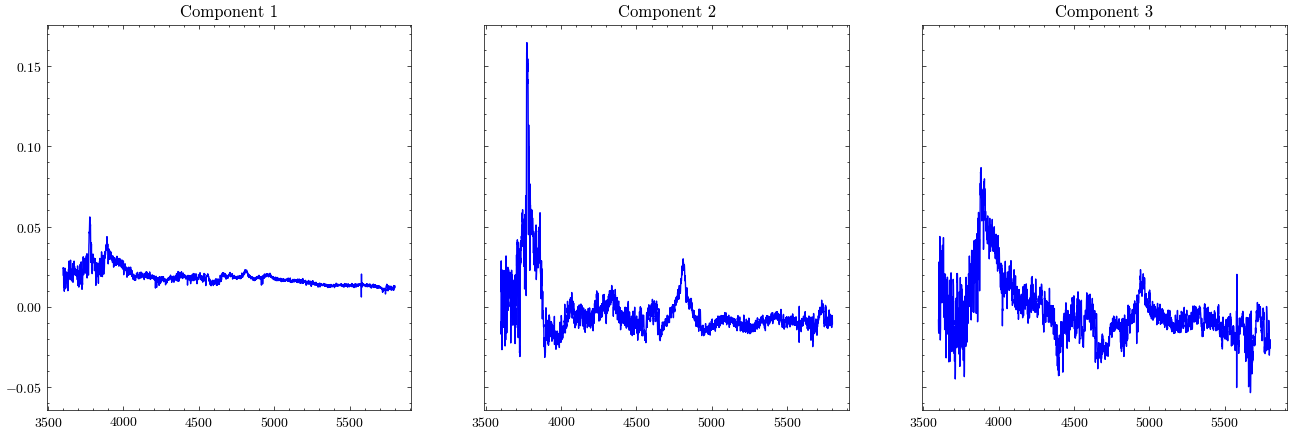

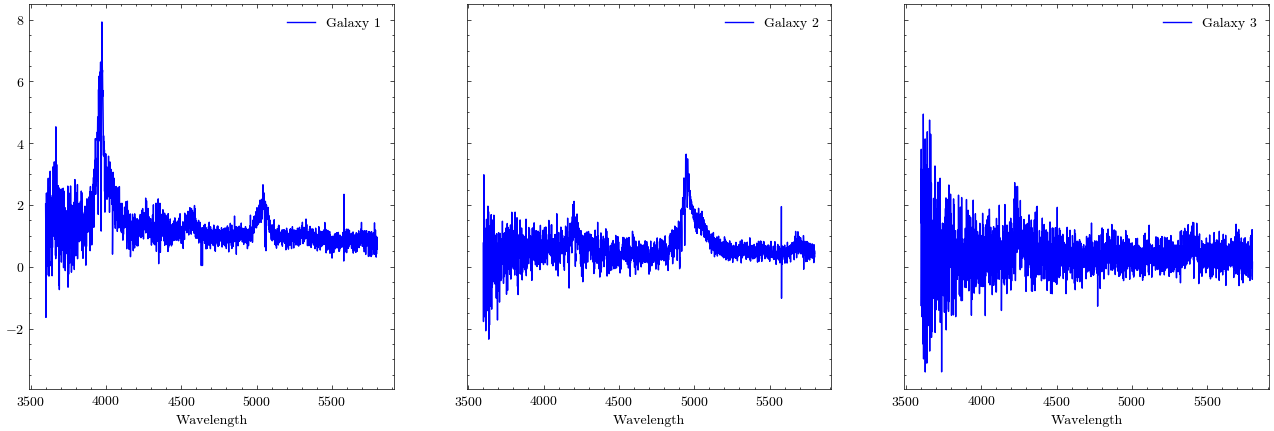

In [4]:
# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(1, n_components + 1), explained_variance_ratio, 'b', marker='.')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

fibermap = Table(spectra_file["FIBERMAP"].data)
tids = fibermap["TARGETID"]
spectra_file.close()

components = pca.components_
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

for i in range(3):
    axes[i].plot(wavelength, components[i], 'b')
    axes[i].set_title(f'Component {i+1}')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

for i in range(3):
    axes[i].plot(wavelength, flux_b[i], 'b', label=f'Galaxy {i+1}')
    axes[i].set_xlabel('Wavelength')
    axes[i].legend()

spec_mean = flux_b.mean(0)
spec = flux_b[3]

coeff = np.dot(components, spec - spec_mean)

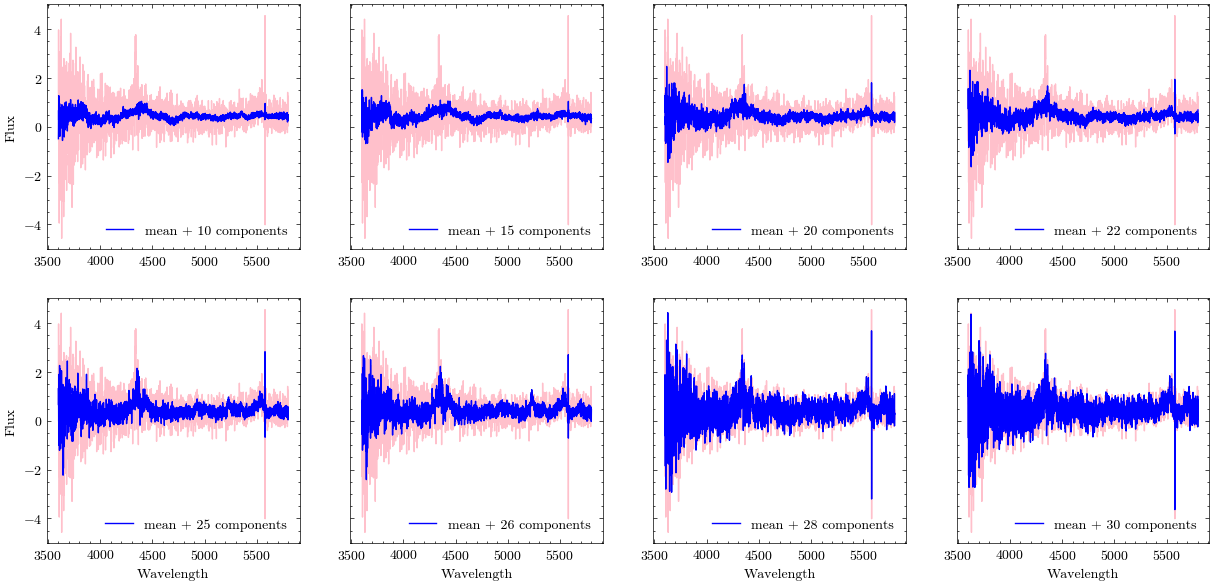

In [5]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15, 7), sharey=True)
j = 0

for i, n in enumerate([10, 15, 20, 22, 25, 26, 28, 30]):
    if i > 3:
        ax[j + 1][i - 4].plot(wavelength, spec, '-', color='pink')
        ax[j + 1][i - 4].plot(wavelength, spec_mean + np.dot(coeff[:n], components[:n]), 'b',
                              label=f'mean + {n} components')
        ax[j + 1][i - 4].legend()
        ax[j + 1][i - 4].set_xlabel('Wavelength')
    else:
        ax[j][i].plot(wavelength, spec, '-', color='pink')
        ax[j][i].plot(wavelength, spec_mean + np.dot(coeff[:n], components[:n]), 'b',
                      label=f'mean + {n} components')
        ax[j][i].legend()

fig.axes[0].set_ylabel('Flux')
fig.axes[4].set_ylabel('Flux')
plt.show()

In [7]:
import numpy as np
from astropy.io import fits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from astropy.table import Table
import os

In [11]:
# Load DESI files
files = os.listdir('/content/drive/MyDrive/Machine-Learning-2023/DESI_EDR/')
desi_files = []

for name in files:
    if ".fits" in name:
        desi_files.append(name)

# Open and extract spectra from the primary file
spectra_file = fits.open("/content/drive/MyDrive/Machine-Learning-2023/DESI_EDR/coadd-sv3-dark-25956.fits")
flux_b = spectra_file["B_FLUX"].data
wavelength = spectra_file["B_WAVELENGTH"].data
spectra_file.close()

# Combine all fluxes into a single array
flux_b = np.vstack([fits.open('/content/drive/MyDrive/Machine-Learning-2023/DESI_EDR/' + archivo)["B_FLUX"].data for archivo in desi_files if "B_FLUX" in fits.open('/content/drive/MyDrive/Machine-Learning-2023/DESI_EDR/' + archivo)])

# Perform PCA
n_components = 50
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(flux_b)
explained_variance_ratio = pca.explained_variance_ratio_

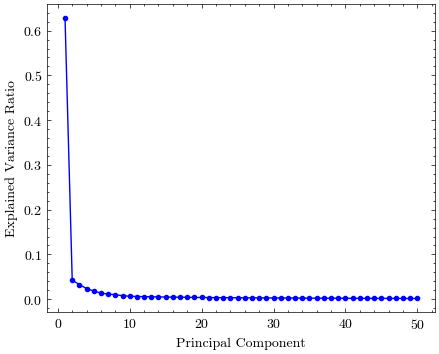

In [12]:
# Plot explained variance ratio
fig = plt.figure(figsize=(5, 4))
plt.plot(np.arange(1, n_components + 1), explained_variance_ratio, 'b', marker='.')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

components = pca.components_

spec_mean = flux_b.mean(0)
spec = flux_b[100]

coeff = np.dot(components, spec - spec_mean)

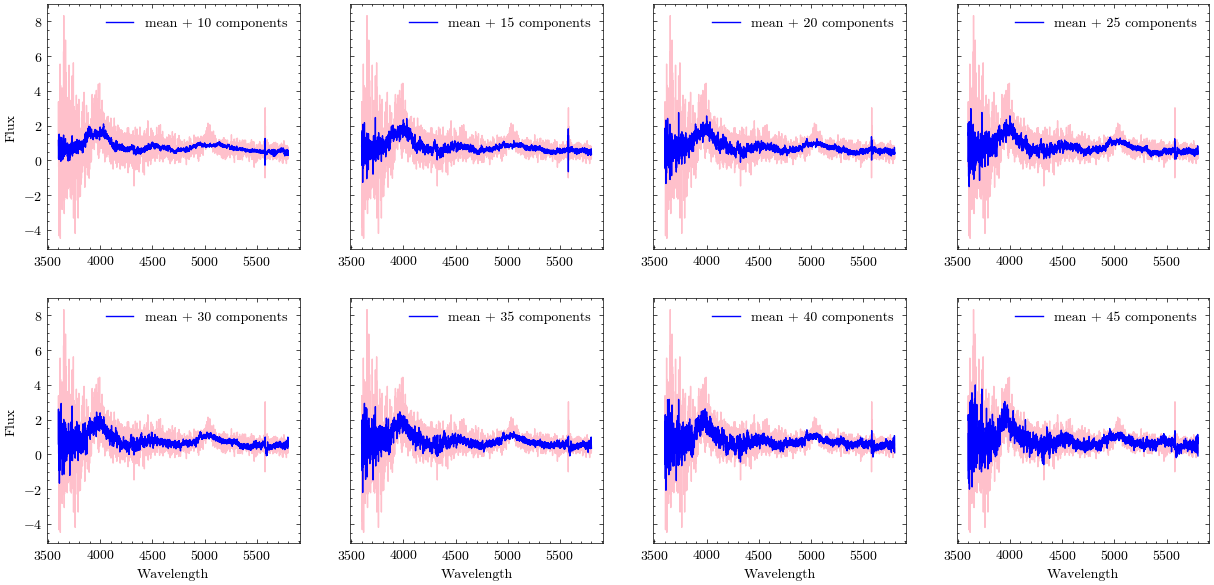

In [16]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(15, 7), sharey=True)
j = 0
for i, n in enumerate([10, 15, 20, 25, 30, 35, 40, 45]):
    if i > 3:
        ax[j + 1][i - 4].plot(wavelength, spec, '-', color='pink')
        ax[j + 1][i - 4].plot(wavelength, spec_mean + np.dot(coeff[:n], components[:n]), 'b',
                              label=f'mean + {n} components')
        ax[j + 1][i - 4].legend()
        ax[j + 1][i - 4].set_xlabel('Wavelength')
    else:
        ax[j][i].plot(wavelength, spec, '-', color='pink')
        ax[j][i].plot(wavelength, spec_mean + np.dot(coeff[:n], components[:n]), 'b',
                      label=f'mean + {n} components')
        ax[j][i].legend()

fig.axes[0].set_ylabel('Flux')
fig.axes[4].set_ylabel('Flux')
plt.show()

zcat = Table.read("/content/drive/MyDrive/Machine-Learning-2023/DESI_EDR/zall-pix-edr-vac.fits", hdu=1)

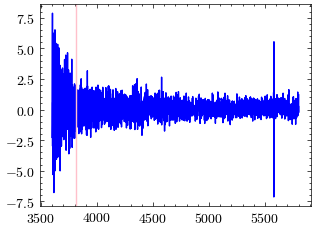

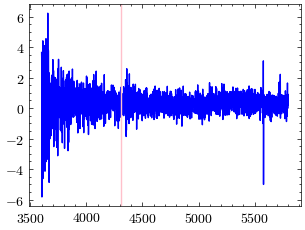

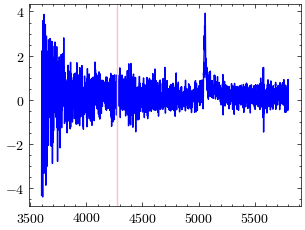

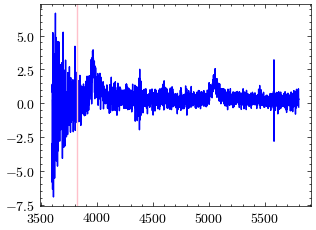

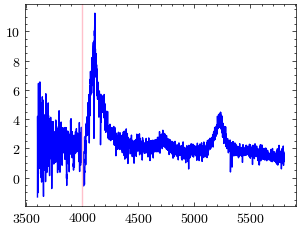

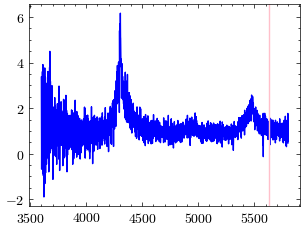

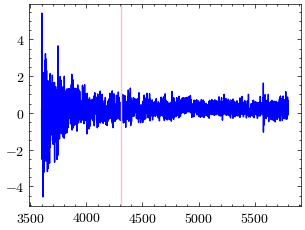

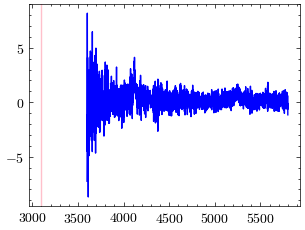

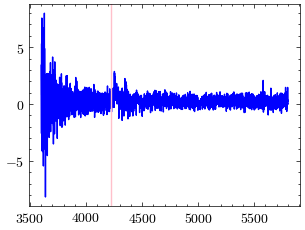

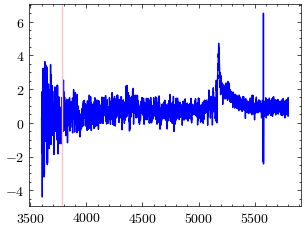

In [15]:
# Display the redshift catalog
zcat

zcat = zcat['TARGETID', 'SURVEY', 'SPECTYPE', 'Z']
zcat

mask = zcat["SURVEY"] == 'sv3'
zcat = zcat[mask]
zcat

mask = np.in1d(zcat["TARGETID"], tids)
zcat = zcat[mask]
zcat

lya = 1216

for i, tid in enumerate(zcat["TARGETID"][:10]):
    z = zcat["Z"][i]
    indx = np.where(tids == tid)[0][0]
    plt.plot(wavelength, flux_b[indx], 'b')
    plt.axvline(1216 * (1 + z), color='pink')
    plt.show()